In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

<AxesSubplot:xlabel='survived', ylabel='count'>

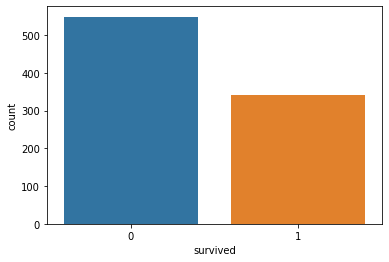

In [5]:
sns.countplot(x='survived',data = df)

<AxesSubplot:xlabel='survived', ylabel='count'>

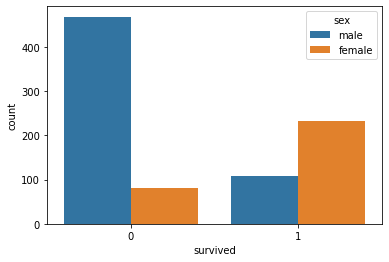

In [6]:
sns.countplot(x='survived',hue='sex',data=df)

In [7]:
df.isnull().any().sum()

4

In [8]:
df.dropna(inplace=True)

In [9]:
sex = pd.get_dummies(df['sex'],drop_first=True)
sex[:5]

,male
1,0
3,0
6,1
10,0
11,0


In [10]:
embark = pd.get_dummies(df['embarked'],drop_first=True)
embark[:5]

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1


In [11]:
cl = pd.get_dummies(df['pclass'],drop_first=True)
cl[:5]

,2,3
1,0,0
3,0,0
6,0,0
10,0,1
11,0,0


In [12]:
df = pd.concat([df,sex,embark,cl],axis=1)

In [13]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,male,Q,S,2,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0,0,0,0,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0,0,1,0,0
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,1,0,1,0,0
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,0,0,1,0,1
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,0,0,1,0,0


In [14]:
df.columns

Index([   'survived',      'pclass',         'sex',         'age',
             'sibsp',       'parch',        'fare',    'embarked',
             'class',         'who',  'adult_male',        'deck',
       'embark_town',       'alive',       'alone',        'male',
                 'Q',           'S',             2,             3],
      dtype='object')

In [15]:
df.drop(['pclass','sex','embarked','class','who','adult_male','deck','embark_town','alive','alone'],axis=1,inplace=True)

In [16]:
df.head()

,survived,age,sibsp,parch,fare,male,Q,S,2,3
1,1,38.0,1,0,71.2833,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,1,0,0
6,0,54.0,0,0,51.8625,1,0,1,0,0
10,1,4.0,1,1,16.7000,0,0,1,0,1
11,1,58.0,0,0,26.5500,0,0,1,0,0


In [17]:
X = df.drop(['survived'],axis=1)
y = df['survived']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=101)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Program Files\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
pred = lr.predict(X_test)

C:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [22]:
pred

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


[[11  7]
 [ 5 32]]
              precision    recall  f1-score   support

           0       0.69      0.61      0.65        18
           1       0.82      0.86      0.84        37

    accuracy                           0.78        55
   macro avg       0.75      0.74      0.74        55
weighted avg       0.78      0.78      0.78        55



In [25]:
import seaborn as sns
from pandas_profiling import ProfileReport
# titanic = sns.load_dataset('titanic')
profile = ProfileReport(df,explorative = True)
profile.to_file("index.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Program Files\Python310\lib\site-packages\multimethod\__init__.py:315: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(*args, **kwargs)
C:\Program Files\Python310\lib\site-packages\multimethod\__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]